In [16]:
%reset -f

In [17]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RepeatedKFold
from math import sqrt
from scipy import stats
from sklearn import preprocessing
from sklearn import ensemble
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, learning_curve
# import ifsg
import json
import re
import glob, os #I ADDED
from sklearn.svm import SVR, LinearSVR #I ADDED
from sklearn.tree import DecisionTreeRegressor #I ADDED

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [18]:
# x=os.path.splitext(os.path.split(os.path.splitext(os.path.split(os.getcwd())[0])[0])[0])
# path_dataset=str(x[0])+os.sep+"Data"+os.sep+ "Datasets"

# print(path_dataset)

In [19]:
file = "W:\\Work\\Assense\\ML\\DataFrames\\NTT_cog_31_03_19.json"
with open(file) as train_file:
    dict_train = json.load(train_file)
sol=[]
# converting json dataset from dictionary to dataframe
df = pd.DataFrame.from_dict(dict_train)
print(df.shape)

for col in list(df.columns):
    if re.search('.grade_no_round', col):
        sol.append(col)
df1= df[sol]
df1.head()

(2, 31)


,cog_cognitive_ability_total_score_w_shp_220119.grade_no_round,cog_performance_IQ_w_shp_220119.grade_no_round,cog_prossecing_speed_wAcc_w_shp_280119.grade_no_round,cog_spatial_reasoning_w_shp_220119.grade_no_round,cog_verbal_reasoning_150119.grade_no_round
5C9D58E657685F4BE56FB09B,5.084755,5.379430,5.269741,5.081388,4.854343
5C9D58FB57685F4BE56FB09C,4.864229,5.137168,5.352156,4.837434,4.642638


In [20]:
file2 = "W:\\Work\\Assense\\ML\\DataFrames\\NTT_wm_31_03_19.json"
with open(file2) as train_file:
    dict_train = json.load(train_file)
sol=[]
# converting json dataset from dictionary to dataframe
df = pd.DataFrame.from_dict(dict_train)
print(df.shape)

for col in list(df.columns):
    if re.search('.grade_no_round', col):
        sol.append(col)
df2= df[sol]
df2.head()

(2, 39)


,wm_Planning_w_shp_230119.grade_no_round,wm_Decisiveness_230119.grade_no_round,wm_Self_Monitoring_200219.grade_no_round,wm_Thoroughness_no_shp_210119.grade_no_round,wm_Time_Management_w_shp_170119.grade_no_round
5C9D58E657685F4BE56FB09B,4.870825,4.475438,4.270110,5.703170,5.095074
5C9D58FB57685F4BE56FB09C,4.535809,4.556929,3.788887,4.047817,5.165706


**Package sort population - since Dec 12th  ver 1.3.3  
678 subjects**

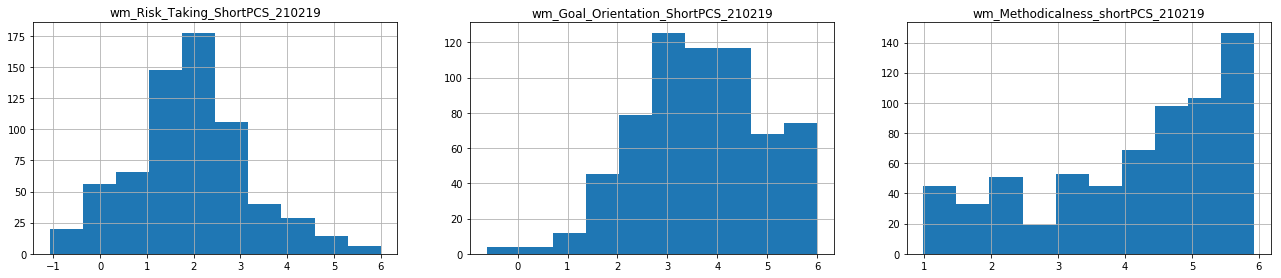

In [5]:
plt.figure(figsize=(30,40))
for i,col in enumerate(df1.columns):
    plt.subplot(8,4,i+1)
    df1[col].hist()
    plt.title(col[:-15])

**Package sort population - after feb 26th  ver 1.3.11  
29 subjects**

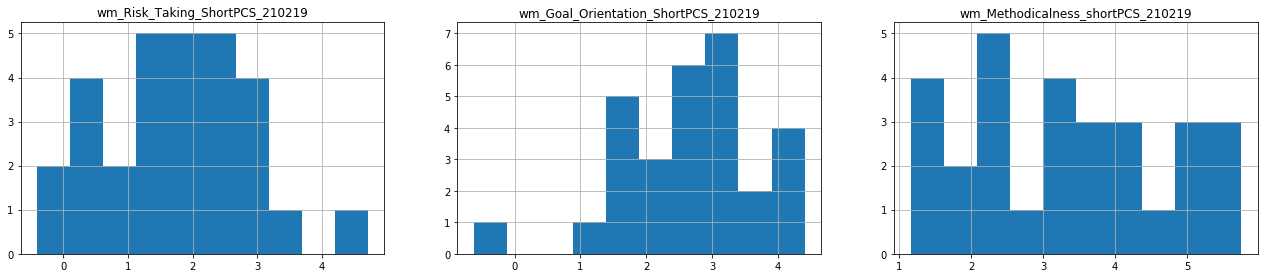

In [6]:
plt.figure(figsize=(30,40))
for i,col in enumerate(df2.columns):
    plt.subplot(8,4,i+1)
    df2[col].hist()
    plt.title(col[:-15])

In [7]:
file = "W:\\Work\\Assense\\ML\\DataFrames\\pcs_df_t2_12_03_19.json"
with open(file) as train_file:
    dict_train = json.load(train_file)
sol=[]
# converting json dataset from dictionary to dataframe
df3 = pd.DataFrame.from_dict(dict_train)
print(df3.shape)
df3.head()

(678, 17)


,pcs.r_MeanConveyorSpeed_ass,pcs.r_HasPackageXrayed_sum,pcs.r_hasCheckedPrice_sum,pcs.r_hasPackageWeighted_sum,pcs.r_nUnnecessaryActions_avg,pcs.r_fLabelAccuracy_wsc,pcs.r_tWeightLabelReWeightEnd_ass,pcs.r_FuncButtonClicked_ass,wm_Risk_Taking_ShortPCS_210219,wm_Risk_Taking_ShortPCS_210219.min_max,wm_Risk_Taking_ShortPCS_210219.grade_no_round,wm_Goal_Orientation_ShortPCS_210219,wm_Goal_Orientation_ShortPCS_210219.min_max,wm_Goal_Orientation_ShortPCS_210219.grade_no_round,wm_Methodicalness_shortPCS_210219,wm_Methodicalness_shortPCS_210219.min_max,wm_Methodicalness_shortPCS_210219.grade_no_round
00373658,0.5678,67.0,52.0,73.0,1.0,8.491595,-0.8538,0.4852,2.295824,1.473750,1.473750,5.110283,5.200176,5.200176,5.478142,5.929403,5.929403
00520964,-1.2846,67.0,52.0,71.0,1.0,8.481803,-0.5564,0.4005,1.131792,0.377669,0.377669,3.591593,3.658124,3.658124,5.058488,5.416267,5.416267
01308307,2.0709,67.0,55.0,73.0,1.0,8.440536,-0.9838,0.5021,3.283778,2.404033,2.404033,6.302902,6.411142,6.000000,5.474103,5.924465,5.924465
01348054,2.4878,67.0,55.0,71.0,1.0,8.425848,-0.1030,0.4326,3.687073,2.783785,2.783785,6.568434,6.680759,6.000000,4.809119,5.111349,5.111349
02601187,-1.5173,66.0,50.0,71.0,1.0,8.372690,-0.6540,0.4162,1.005185,0.258452,0.258452,3.352217,3.415066,3.415066,4.610731,4.868768,4.868768


In [8]:
file2 = "W:\\Work\\Assense\\ML\\DataFrames\\temp\\pcs_pop_after_26_df.json"
with open(file2) as train_file:
    dict_train = json.load(train_file)
sol=[]
# converting json dataset from dictionary to dataframe
df4 = pd.DataFrame.from_dict(dict_train)
print(df4.shape)
df4.head()

(29, 17)


,pcs.r_MeanConveyorSpeed_ass,pcs.r_HasPackageXrayed_sum,pcs.r_nUnnecessaryActions_avg,pcs.r_hasPackageWeighted_sum,pcs.r_hasCheckedPrice_sum,pcs.r_fLabelAccuracy_wsc,pcs.r_tWeightLabelReWeightEnd_ass,pcs.r_FuncButtonClicked_ass,wm_Risk_Taking_ShortPCS_210219,wm_Risk_Taking_ShortPCS_210219.min_max,wm_Risk_Taking_ShortPCS_210219.grade_no_round,wm_Goal_Orientation_ShortPCS_210219,wm_Goal_Orientation_ShortPCS_210219.min_max,wm_Goal_Orientation_ShortPCS_210219.grade_no_round,wm_Methodicalness_shortPCS_210219,wm_Methodicalness_shortPCS_210219.min_max,wm_Methodicalness_shortPCS_210219.grade_no_round
5BEAF7E89D6AB6598B4A9D4C,-2.6031,65.0,1.000000,70.0,51.0,8.297550,-0.8091,0.4097,0.296865,-0.408519,-0.408519,2.447954,2.496892,2.496892,4.834886,5.142855,5.142855
5C775AB62AB17B32126007AA,-0.2360,30.0,0.583333,32.0,7.0,6.380617,-0.0036,-1.2682,4.506654,3.555523,3.555523,3.264451,3.325949,3.325949,1.908945,1.565133,1.565133
5C7883392AB17B32126007AB,0.0887,45.0,0.916667,48.0,37.0,4.777966,1.1441,-0.1705,3.597042,2.699010,2.699010,2.580722,2.631703,2.631703,3.275220,3.235759,3.235759
5C7883A62AB17B32126007AC,-0.5375,39.0,0.583333,35.0,45.0,5.536642,-0.0416,-0.4193,3.483827,2.592404,2.592404,2.569262,2.620066,2.620066,2.547921,2.346447,2.346447
5C7CDD64EC47913F22FBE8AB,-0.8996,66.0,1.000000,73.0,54.0,8.555344,-0.3609,0.4616,1.249540,0.488544,0.488544,3.927550,3.999250,3.999250,5.288551,5.697579,5.697579


***Creating only relevant subject data frame***


In [64]:
# dropping pop from old_pop


old_pop = "W:\\Work\\Assense\\ML\\DataFrames\\temp\\old_pop_df_12_03_19.json" #contains all pop until feb 26th
pop = "W:\\Work\\Assense\\ML\\DataFrames\\temp\\df_PCS_only_all_subjects_210219.json" #contains all pop on which models are based
with open(pop) as train_file:
    dict_train = json.load(train_file)
# converting json dataset from dictionary to dataframe
df_pop = pd.DataFrame.from_dict(dict_train)
print(df_pop.shape)
print(df_pop.index)

with open(old_pop) as train_file:
    dict_train = json.load(train_file)
df_old = pd.DataFrame.from_dict(dict_train)
print(df_old.shape)
print(df_old.index)

new_df = df_old.drop(df_pop.index[[]], axis = 0)

print(new_df.shape)



(418, 3165)
Index(['10631284', '10764763', '12028081', '13013254', '13811061', '15719338',
       '16520487', '16782950', '17159510', '17405816',
       ...
       'M14', 'M15', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'],
      dtype='object', length=418)
(647, 17)
Index(['00373658', '00520964', '01308307', '01348054', '02601187', '02718050',
       '03895706', '04269150', '04395124', '05054874',
       ...
       'W1852194', 'W1852195', 'W1852196', 'W1852197', 'W1852198', 'W1852199',
       'W1852211', 'W1852212', 'W1852213', 'W1852214'],
      dtype='object', length=647)
(647, 17)


all pcs pop


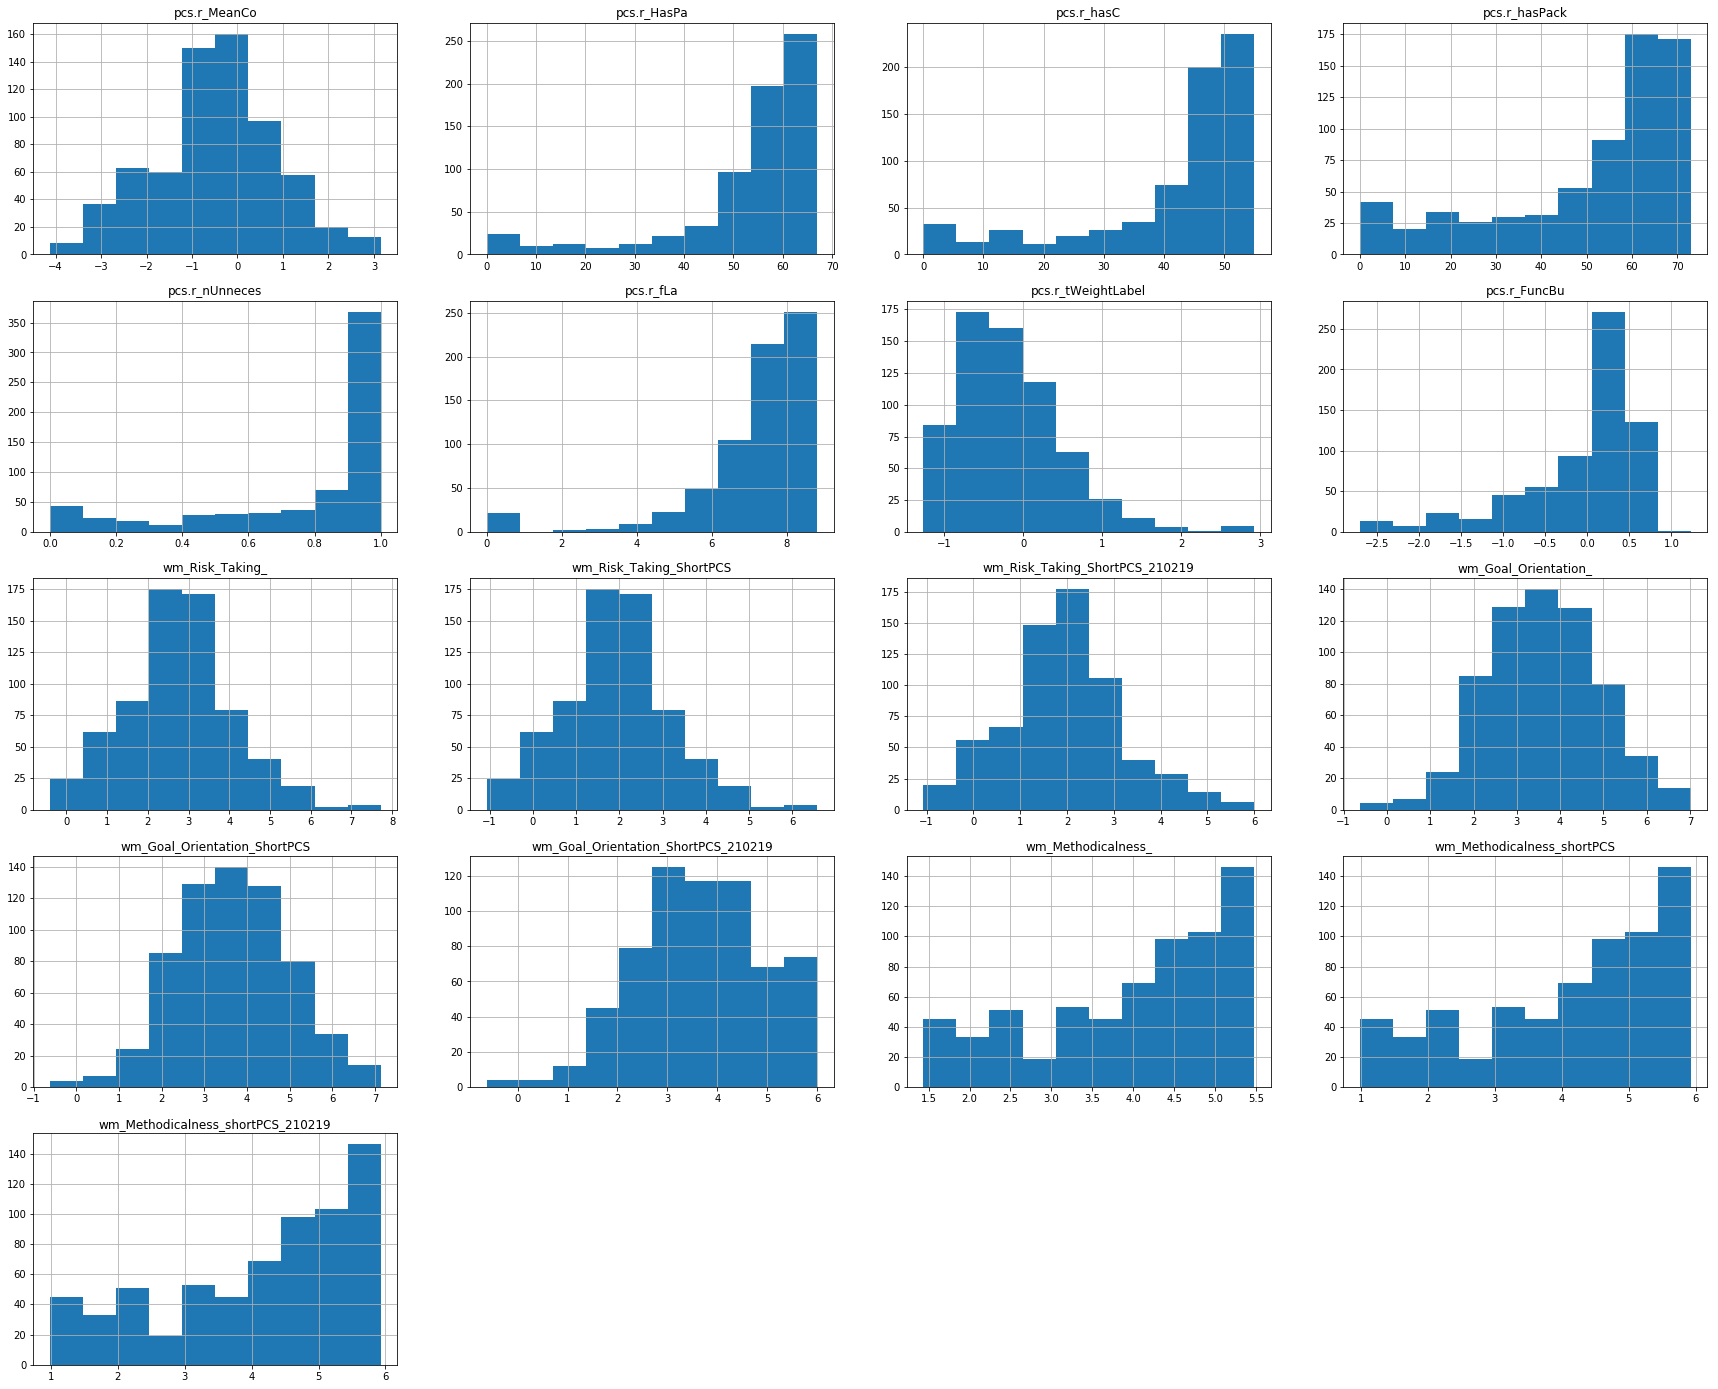

In [55]:
plt.figure(figsize=(30,40))
print('all pcs pop')
for i,col in enumerate(df3.columns):
    plt.subplot(8,4,i+1)
    df3[col].hist()
    plt.title(col[:-15])

after 26


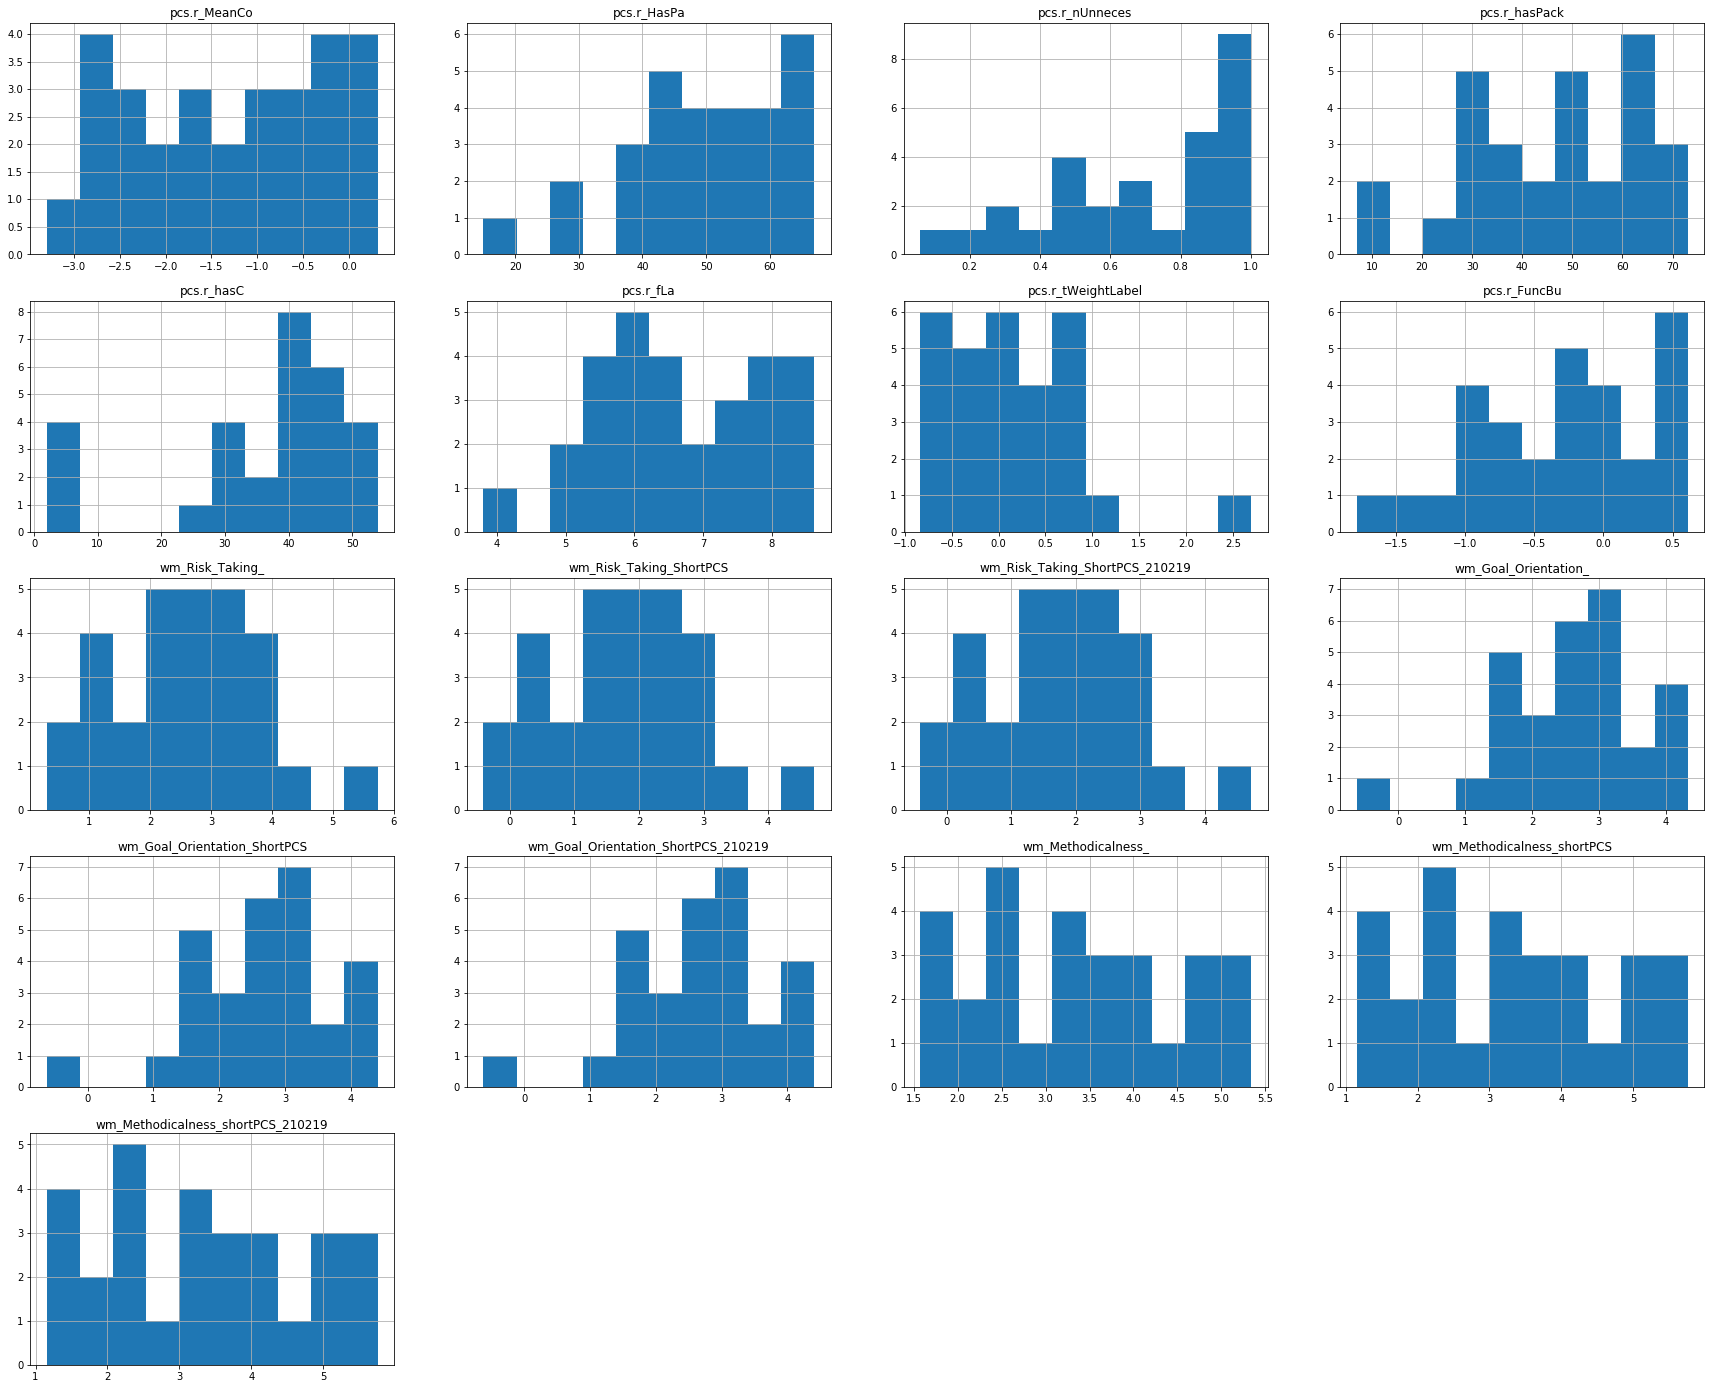

In [33]:
plt.figure(figsize=(30,40))
print('after 26')
for i,col in enumerate(df4.columns):
    plt.subplot(8,4,i+1)
    df4[col].hist()
    plt.title(col[:-15])